# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D inputSet (`inputSet`), and return the subset of such inputSet (`outputSet`) that lie on the convex hull.

In [ ]:
# Reusable data structures and functions for the algorithms
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __repr__(self) -> str:
          return f"{self.x},{self.y}"

def distance(p, q):
    return abs(p.x - q.x) + abs(p.y - q.y)

def cross_product(p,q,r):
    return (q.x - p.x)*(r.y - p.y) - (r.x - p.x)*(q.y - p.y)


# Auxilliary functions for Jarvis March
def calculate_orientation(p, q, r):
        crossProduct = cross_product(p,q,r)

        if (crossProduct > 0): return 1         # Clockwise
        elif (crossProduct < 0): return 2       # Counterclockwise
        else: return 0                          # Collinear
        
def find_left_most_point(points):
        leftMostIndex = 0
        for i in range(1, len(points)):
                currentLeftMost = points[leftMostIndex]
                currentPoint = points[i]
                
                # Update to new left most point
                if currentPoint.x < currentLeftMost.x:
                        leftMostIndex = i
                
                # If multiple points have same x coord, prioritise largest y
                elif currentPoint.x == currentLeftMost.x:
                        if currentPoint.y > currentLeftMost.y:
                                leftMostIndex = i
                        
        return leftMostIndex\

def jarvis_march(inputSet):      
    leftMostPoint = find_left_most_point(inputSet)
    outputSet = []
        
    origin = inputSet[leftMostPoint]
    outputSet.append(origin)
        
    p = leftMostPoint
        
    while True:
        q = (p + 1) % len(inputSet)
        for i in range(len(inputSet)):
                if i == p:
                        continue
                output = calculate_orientation(inputSet[p], inputSet[i], inputSet[q])
                if output == 0 and distance(inputSet[p], inputSet[i]) > distance(inputSet[p], inputSet[q]):
                        q = i
                        
                elif output == 2:
                        q = i
        p = q
        if p == leftMostPoint:
                break
                
        outputSet.append(inputSet[p])

    return outputSet



Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D inputSet (`inputSet`), and return the subset of such inputSet that lie on the convex hull (`outputSet`).

[401,6, 977,8, 976,785, 973,936, 885,973, 741,996, 214,956, 73,927, 21,803, 5,325, 6,198, 152,46]


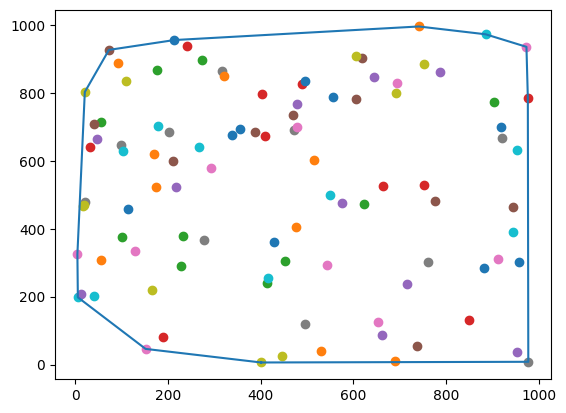

In [1]:
# Reusable data structures and functions for the algorithms
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __repr__(self) -> str:
          return f"{self.x},{self.y}"

def distance(p, q):
    return abs(p.x - q.x) + abs(p.y - q.y)

def cross_product(p,q,r):
    return (q.x - p.x)*(r.y - p.y) - (r.x - p.x)*(q.y - p.y)


# Auxilliary functions and data structure for Graham Scan
class PointSymbolTable: #technically a binary tree
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
    
    # in order traversal to list
    def valuesToList(self):
        return (self.left.valuesToList() if self.left else []) + [self.value] + (self.right.valuesToList() if self.right else [])
    
    # normal binary tree get
    def get(self, key): 
        if self.key == key:
            return self.value
        else:
            if self.key < key:
                return self.right.get(key)
            else:
                return self.left.get(key)

    # normal binary tree put
    def put(self, key, value, ref):
        if self.key == key:
            # always keep furthest point from reference point
            self.value = value if distance(value, ref) > distance(self.value, ref) else self.value
        elif self.key < key:
            if self.right is not None:
                self.right.put(key, value, ref)
            else:
                self.right = PointSymbolTable(key, value)
        else:
            if self.left is not None:
                self.left.put(key, value, ref)
            else:
                self.left = PointSymbolTable(key, value)
    
def cross_product(p1,p2,p3):
    return (p2.x - p1.x)*(p3.y - p1.y) - (p3.x - p1.x)*(p2.y - p1.y)

def sort_key(start,p1): #sort by -1/tan (angle)
    if p1.y == start.y:
        return float('inf') if p1.x - start.x < 0 else float('-inf')
    return - (p1.x - start.x) / (p1.y - start.y)



# Graham Scan
def graham_scan(listOfPoints):
    stack=[]
    #find point with lowest y co-ordinate - if y is the same take lowest x
    point0 = listOfPoints[0]
    for current in listOfPoints[1:]:
        if (current.y < point0.y) or ((current.y == point0.y) and (current.x < point0.x)):
            point0 = current
    #initialise symbol table with angle key and point value
    symTable = PointSymbolTable(sort_key(point0,listOfPoints[0]),listOfPoints[0])

    #calculate angles then sort by angle using symbol table
    for current in listOfPoints:
        if current != point0:
            symTable.put(sort_key(point0,current),current,point0)
    
    sortedPoints = [point0] + symTable.valuesToList()
    #push first two points onto stack
    stack.append(sortedPoints[0])
    stack.append(sortedPoints[1])
    for i in range(2,len(sortedPoints)):
        while len(stack) > 1 and cross_product(stack[-2],stack[-1],sortedPoints[i]) <= 0:
                #if < 0 then we are turning right so pop the last point from the stack - anticlockwise search
                stack.pop()
        stack.append(sortedPoints[i])
    return stack

import random
import matplotlib.pyplot as plt
def generateRandomPoints(n):
    myPoints = []

    for i in range(n):
        myPoints.append(Point(random.randint(1, 1000), random.randint(1, 1000)))

    return myPoints

def plotConvexHull(points):
    xPoints = [point.x for point in points]
    yPoints = [point.y for point in points]

    xPoints.append(xPoints[0])
    yPoints.append(yPoints[0])

    plt.plot(xPoints, yPoints)

def scatterPlotPoints(points):
    xPoints = [point.x for point in points]
    yPoints = [point.y for point in points]

    for point in points:
        plt.scatter(point.x, point.y)
inputSet = generateRandomPoints(100)
outputSet = graham_scan(inputSet)
print(outputSet)
scatterPlotPoints(inputSet)
plotConvexHull(outputSet)
plt.show()


Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D inputSet (`inputSet`), and return the subset of such inputSet that lie on the convex hull (`outputSet`).

In [3]:

def jarvisMarchModified(hulls):      
    '''
    Returns the list of inputSet that lie on the convex hull (jarvis march algorithm)
            Parameters:
                    inputSet (list): a list of 2D inputSet

            Returns:
                    outputSet (list): a list of 2D inputSet
                    
                    
    '''
    points = []
    for hull in hulls:
        points.extend(hull)
        
    leftMostPoint = findLeftMostPoint(points)
    
    outputSet = []
    origin = points[leftMostPoint]
    outputSet.append(origin)
        
    p = leftMostPoint
        
    while True:
        q = (p + 1) % len(points)
        for i in range(len(points)):
                if isBetterOrientation(points[p], points[q], points[i]):
                        q = i
        p = q
        if p == leftMostPoint:
                break
                
        outputSet.append(points[p])

    return outputSet

def createSubsets(inputSet):
    # size of convex hull approximated at root of total number of points
    m = int(math.sqrt(len(inputSet)))
    while len(inputSet) % m < 3 and len(inputSet) % m != 0:
        m +=1
    
    subsets = []
    
    for i in range(0, len(inputSet), m):
        subset = inputSet[i: i + m]
        subsets.append(subset)

    return subsets


def chenScan(inputSet):
    # portions points into subsets
    subsets = createSubsets(inputSet)

    # uses grahams to form sub convex hulls
    hulls = [graham_scan(subset) for subset in subsets]

    # forms final convex hull using jarvis march
    outputSet = jarvisMarchModified(hulls)
    
    return outputSet

''' Alternative Chens, faster only for really really large numbers of points 

def createSubsets(inputSet, m):
    subsets = []
    for i in range(0, len(inputSet), m):
        subset = inputSet[i: i + m]
        if len(subset) < 3:
            return []
        subsets.append(subset)

    return subsets

# attempts to solve for a convex hull of size m
# if it fails it then tries for a larger size m (previous m squared each failure)
def chensScan(inputSet):
    t = 0
    outputSet = []

    while not outputSet:
        t += 1
        m = 2 ** 2 ** t

    
        # portions points into subsets
        subsets = createSubsets(inputSet, m)

        #invalid number of subsets, move onto next m
        if not subsets:
            continue
        
        # forms sub convex hulls using grahams
        # then creates a final convex hull using jarvis
        hulls = [graham_scan(subset) for subset in subsets]
        outputSet = jarvisMarchModified(hulls, m)

    return outputSet

'''


Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [4]:
import random

def isBetterOrientation(p, q, r):
        crossProduct = (q[0] - p[0]) * (r[1] - p[1]) - (q[1] - p[1]) * (r[0] - p[0])
        
        # Counterclockwise - accept
        if crossProduct < 0:
                return True
        # Collinear - only accept if further away
        elif crossProduct == 0:
                if calcDistance(p, r) > calcDistance(p, q):
                        return True
        
        return False



''' not sure how to order , apologies for the mess '''


class TestDataGenerator():
    """
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass


Use the cell below to implement the requested **experimental framework** API.

In [5]:
import timeit
import matplotlib

class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

In [6]:
# ADD YOUR TEST CODE HERE 



